# 2.4 Exercises

## Conceptual

### 1

1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

    1. The sample size _n_ is extremely large, and the number of predictors _p_ is small.
    1. The number of predictors _p_ is extremely large, and the number of observations _n_ is small.
    1. The relationship between the predictors and response is highly non-linear.
    1. The variance of the error terms, i.e. $o^2 = Var(\epsilon)$, is extremely high.
    
__Answers__

1. 
    1. Flexible method, because of the large sample size, there are a lot of options to test and verify the flexible method.
    1. Inflexible method, the high bias may reduce overfitting.
    1. Flexible method, to be able to capture the non-linear relationship.
    1. Inflexible, very prone to overfitting on the error terms.

### 2

1. Explain whether each scenario is a classification or regression problem, and indicate whether we are most interested in inference or prediction. Finally, provide _n_ and _p_.
    1. We collect a set of data on the the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.
    1. We are considering launching a new product and wish to know whether it will be a _success_ or a _failure_. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.
    1. We are interested in predicting the % change in the USD/Euro exchange rates in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the USD/Euro, the % change in the US market, the % change in the British market, and the % change in the German market.
    
__Answers__

1. 
    1. Inference ("\[...\] which factors affect \[...\]"), $n = 500$, $p=3$.
    1. Classification ("success or failure"), $n=20$, $p = 13$.
    1. Regression ("% change"), $n=52$, $p=3$

### 3

1. We now revisit the bias-variance decomposition.
    1. Provide a sketch of typical (squared) bias, variance, training error, test error, and Bayes (or irreducible) error curves, on a single plot, as we go from less flexible statistical learning methods towards more flexible approaches. The _x_-axis show represent the amount of flexibility in the method, and the _y_-axis should represent the values for each curve. There should be five curves. Make sure to label each one.
    1. Explain why each of the five curves has the shape displayed in part (a).

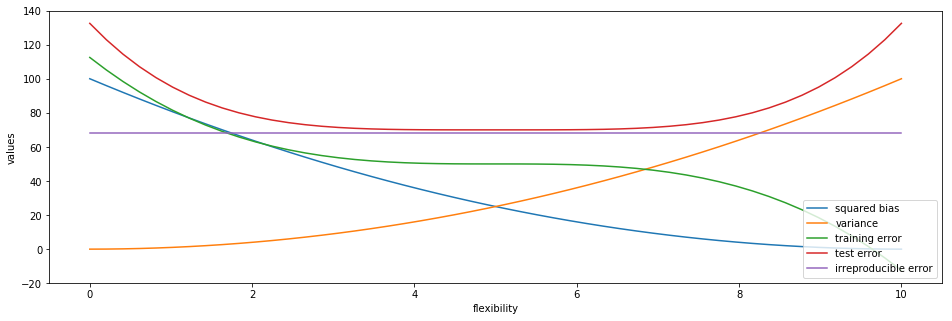

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,10)

plt.figure(figsize=(16,5))
plt.plot(x, (x-10)**2, label="squared bias")
plt.plot(x, x**2, label="variance")
plt.plot(x, -0.5*(x-5)**3+50, label="training error")
plt.plot(x, 0.1*(x-5)**4+70, label="test error")
plt.plot(x, np.repeat(68,len(x)), label="irreproducible error")
plt.legend(loc='lower right')
plt.xlabel('flexibility')
plt.ylabel('values')
plt.show()

__Squared bias__: the bias reduces as the flexibility increases because with a low flexibility we assume e.g. a linear relationship between the predictor variables and the response which may not be given.  
__Variance__: Because we tend to learn small variances in the data with a more flexible model the variance increases as the flexibility increases.  
__Training error__: Given a flexible model we can just memorize the training data and thereby reduce the mse.  
__Test error__: The test mse reduces with the training mse until the model can overfit the data - when this happens the test mse goes up again and the typical u-shape originates.  
__Irreproducible error__: The bayes error in inherent in the data and therefor constant. It is less than the test mse because we can not learn (and _reduce_) the irreproducible error.

### 4

1. You will now think of some real-life applications for statistical learning.
    1. Describe three real-life applications in which _classification_ might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.
    1. Describe three real-life applications in which _regression_ might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.
    1. Describe three real-life applications in which _cluster analysis_ might be useful.
    
__Answers__

1. Classification:
    1. Fraud detection: Fraudulent or non-fraudulent as response, possible predictors: amount of money, target person, available amount.
    1. Cats or dogs: Predict whether a picture shows a cat or a dog (response), possible predictors: pixels from pictures.
    1. Rebuyer: Will the client buy again from the seller (response), possible predictors: age, registration date, purchase value.
1. Regression:
    1. Movie Rating: Response is 1 to 5 stars, possible predictors: genre, actors, budget.
    1. Stock market prediction: Value of the stock market for the next day (response), possible predictors: stock market values for the last years / days, weather data, news of the company.
    1. Sold-out-date-prediction: Predict when an item in a shop will be sold out (response), possible predictors: available stock, amount of customers, weather data.
1. Cluster analysis
    1. Peer-group: Find segments in the the customers (response), possible predictors: age, area, purchased goods.
    1. Movie recommendation: Find movies which other customers liked. See above.
    1. Sensor data: Find sensors which behave equally (response), possible predictors: timeseries of measurements in the past.

### 5

1. What are the advantages and disadvantages of a very flexible (versus a less flexible) approach for regression or classification? Under what circumstances might a more flexible approach be preferred to a less flexible approach? When might a less flexible approach be preferred?

__Answer__

1. The biggest advantage of a very flexible approach is the possibility to train a very good predictor which performs well on the training data and on the test data. The downside is the possibility of overfitting. The less flexible approach should be preferred when the model should be interpreted afterwards or when there is only a small amount of data available.

### 6

1. Describe the differences between a parametric and a non-parametric statistical learning approach. What are the advantages of a parametric approach to regression or classification (as opposed to a non-parametric approach)? What are its disadvantages?

__Answer__

1. A parametric approach assumes an underlying function $f$ which models the data. In the training phase the parameters of $f$ are estimated. A non-parametric approach does not assume such a function and tries to base the prediction as close to the available data points as possible.  
The advantage of the parametric approach is that only the parameters have to be estimated, the disadvantage is that the function for which the parameters are estimated may not describe the true relationship between the predictors and the response well. For the non-parametric approach more data is needed.

### 7

1. The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.

|Obs.|X1|X2|X3|Y|
|----|--|--|--|-|
|1|0|3|0|Red|
|2|2|0|0|Red|
|3|0|1|3|Red|
|4|0|1|2|Green|
|5|-1|0|1|Green|
|6|1|1|1|Red|

Suppose we wish to use this data set to make a prediction for $Y$ when $X_1 = X_2 = X_3 = 0$ using _K_-nearest neighbours.

1. 
    1. Compute the Euclidian distance between each observation and the test point, $X_1 = X_2 = X_3 = 0$.
    1. What is our prediction with $K=1$? Why?
    1. What is our prediction with $K=3$? Why?
    1. If the Bayes decision boundary in this problem is highly non-linear, then would we expect the _best_ value for $K$ to be large or small? Why?

In [2]:
import pandas as pd

def dist(a,b):
    return np.sqrt(np.sum(np.square(a-b)))

y = np.array([0,0,0])
df = pd.DataFrame([
    [0,3,0,'r'],
    [2,0,0,'r'],
    [0,1,3,'r'],
    [0,1,2,'g'],
    [-1,0,1,'g'],
    [1,1,1,'r']],
    columns=['x1','x2','x3','y'])

print(df.iloc[:,0:3].apply(lambda x : dist(x,y),axis=1))

0    3.000000
1    2.000000
2    3.162278
3    2.236068
4    1.414214
5    1.732051
dtype: float64


__Answer__
1. 
    1. The prediction for $K=1$ is 'green' because the 5th observation is the closest.
    1. The prediction for $K=3$ is 'red' because two of the three closest points are red.
    1. When it's highly non linear we would expect the best value for $K$ to be small so we are able to capture the local non-linearities in the data.